In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 39.5 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=d7e59c8b1eabe7c608d065ac27d20d1a93cab718fc588b7b4d448f2117ac12be
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

### Criando Antecendete e Consequente

In [3]:
service = ctrl.Antecedent(np.arange(0, 11, 1), "service")
food = ctrl.Antecedent(np.arange(0, 11, 1), "food")

tip = ctrl.Consequent(np.arange(5, 26, 1), "tip")

service.automf(3)
food.automf(3)

tip["low"] = fuzz.trimf(tip.universe, [5, 5, 15])
tip["medium"] = fuzz.trimf(tip.universe, [5, 15, 25])
tip["high"] = fuzz.trimf(tip.universe, [15, 25, 25])

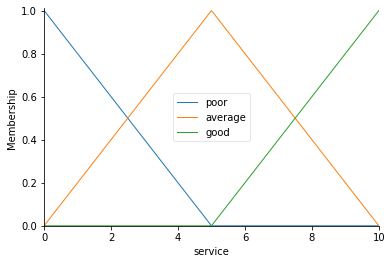

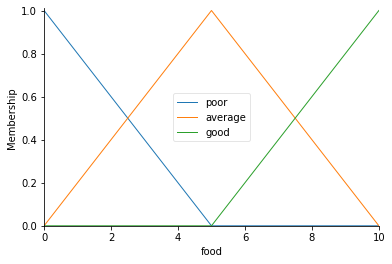

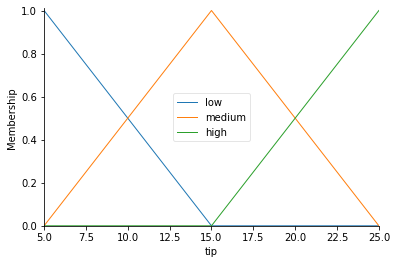

In [4]:
service.view()
food.view()
tip.view()

### Criando Regras

In [5]:
rule1 = ctrl.Rule(service["poor"] | food["poor"], tip["low"])
rule2 = ctrl.Rule(service["average"], tip["medium"])
rule3 = ctrl.Rule(service["good"] | food["good"], tip["high"])

### Criando Sistema

In [6]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [7]:
tipping.input["service"] = 10
tipping.input["food"] = 10

tipping.compute()

Gorjeta: 21.67%


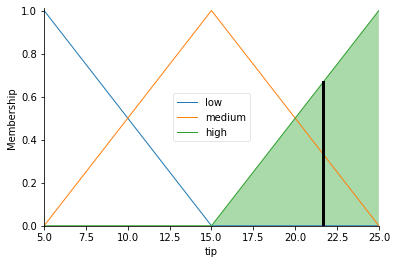

In [8]:
print(f"Gorjeta: {tipping.output['tip']:.2f}%")
tip.view(sim=tipping)